# Generating images

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter
from pathlib import Path

### Pandas options

In [2]:
pd.set_option('max_row', None)
pd.set_option('max_column', None)

## File paths

In [3]:
root = Path()
info_path = root / 'info'
data_proc = root / 'data' / 'data_proc'
out_path =root / 'output'
out_path.mkdir(exist_ok=True)
out_tables = out_path / 'exracted_tables'
out_tables.mkdir(exist_ok=True)
file_name = out_tables / 'collected_data.pkl'
out_path.mkdir(exist_ok=True)
save_fig_path = out_path / 'figs'
save_fig_path.mkdir(exist_ok=True)

## Reading collected data

In [4]:
df = pd.read_pickle(file_name)
df.head()

Subject          S001                                                    \
Experiment    03_LR_R                                 04_LR_I             
Channel            32        37        49        54        32        37   
Time Window                                                               
4            0.793449  0.755241  0.617797  0.550517  0.771347  0.729136   
5            0.806398  0.770357  0.616230  0.546597  0.783391  0.744087   
7            0.827531  0.794459  0.629312  0.558175  0.804520  0.769459   
9            0.842143  0.810356  0.648647  0.578601  0.819106  0.786055   
11           0.852130  0.820738  0.668231  0.600921  0.828868  0.796344   

Subject                                                                  \
Experiment                        05_TD_R                                 
Channel            49        54        32        37        49        54   
Time Window                                                               
4            0.606722  0.532955  0.784391  0.746526  0.617352  0.557373   
5            0.603600  0.527625  0.793075  0.756907  0.613905  0.549902   
7            0.613580  0.536383  0.809901  0.776988  0.624155  0.557364   
9            0.632212  0.556144  0.822250  0.791286  0.641623  0.576187   
11           0.653635  0.580024  0.830170  0.800093  0.658990  0.597075   

Subject                                                                  \
Experiment    06_TD_I                                 07_LR_R             
Channel            32        37        49        54        32        37   
Time Window                                                               
4            0.791852  0.754740  0.586432  0.510388  0.621241  0.516762   
5            0.806951  0.773609  0.589686  0.513138  0.653269  0.563389   
7            0.830201  0.801542  0.608309  0.532668  0.708456  0.638413   
9            0.845076  0.818403  0.631899  0.558642  0.748957  0.690494   
11           0.854010  0.827719  0.655923  0.586118  0.776885  0.724988   

Subject                                                                  \
Experiment                        08_LR_I                                 
Channel            49        54        32        37        49        54   
Time Window                                                               
4            0.559433  0.476876  0.742542  0.690584  0.578229  0.493384   
5            0.561418  0.476696  0.761598  0.713689  0.585306  0.496186   
7            0.579714  0.493241  0.790182  0.747607  0.609802  0.518173   
9            0.604027  0.517781  0.808251  0.768163  0.636361  0.546523   
11           0.628314  0.543891  0.819335  0.780124  0.660409  0.574600   

Subject                                                                  \
Experiment    09_TD_R                                 10_TD_I             
Channel            32        37        49        54        32        37   
Time Window                                                               
4            0.711229  0.650485  0.602102  0.531138  0.771781  0.725876   
5            0.730825  0.678267  0.593533  0.520525  0.784899  0.742362   
7            0.763566  0.720837  0.597326  0.522256  0.807462  0.769590   
9            0.785682  0.747463  0.612949  0.538371  0.823079  0.787573   
11           0.799648  0.763070  0.631740  0.559273  0.833250  0.798561   

Subject                                                                  \
Experiment                        11_LR_R                                 
Channel            49        54        32        37        49        54   
Time Window                                                               
4            0.625645  0.545864  0.779393  0.744635  0.592349  0.509111   
5            0.623613  0.541147  0.789456  0.756582  0.590809  0.504850   
7            0.634892  0.551014  0.807511  0.777205  0.604465  0.517116   
9            0.652088  0.569912  0.820682  0.791189  0.626541  0.540560   
11           0.66960

In [24]:
df_subj = df.loc[:, ('S007', slice(None), slice(None))].droplevel(level='Subject',axis=1)
l_aux =[]
pat = '_LR_R'

def filter_col(pat,  lev_list):
    for i in lev_list:
        if pat in i:
            l_aux.append(i)

    return l_aux

## Generating images for all the subjects

Experiment    03_LR_R                                 07_LR_R            \
Channel            32        37        49        54        32        37   
Time Window                                                               
4            0.993781  0.994371  0.907173  0.881332  0.992709  0.993237   
5            0.992447  0.992937  0.857639  0.819865  0.991679  0.992051   
7            0.991833  0.991994  0.746467  0.686130  0.991771  0.991864   
9            0.992988  0.993002  0.669396  0.597290  0.993198  0.993203   
11           0.994445  0.994420  0.621602  0.544724  0.994665  0.994648   

Experiment                        11_LR_R                                
Channel            49        54        32        37        49        54  
Time Window                                                              
4            0.865006  0.833003  0.992633  0.993142  0.855896  0.821467  
5            0.803078  0.758427  0.991739  0.992083  0.794609  0.748121  
7            0.692599  0.6283

IndexError: index 2 is out of bounds for axis 0 with size 2

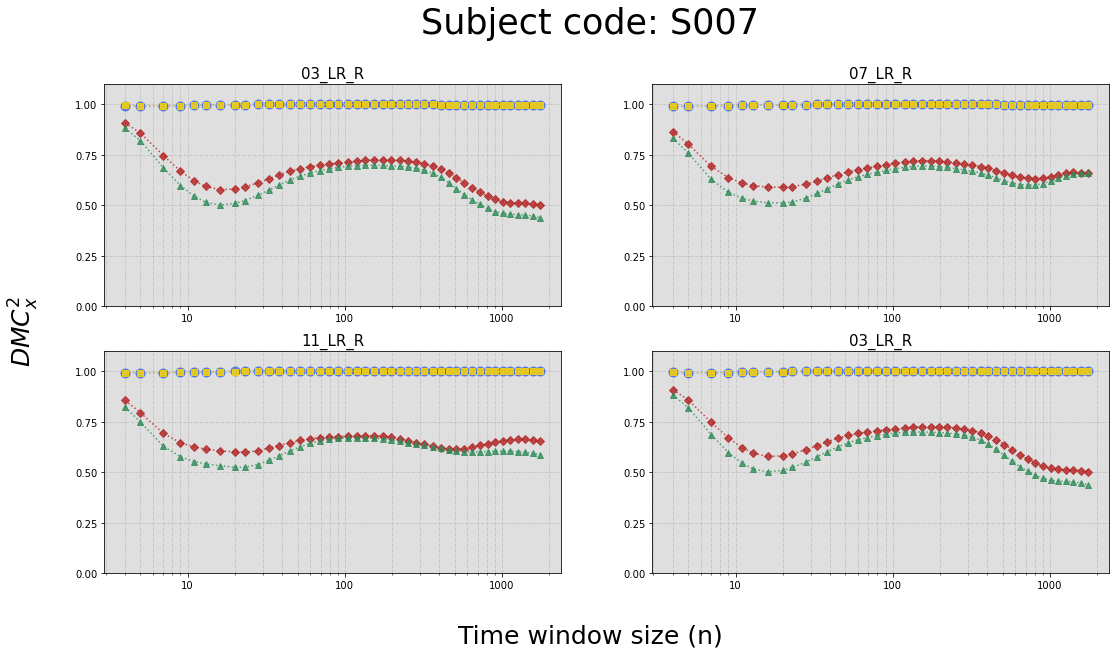

In [30]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = True
info_labels = False

# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config = True
max_display_img_config = 7

col_lev_list = df.columns.levels
subj_level = col_lev_list[0]
channels = col_lev_list[2]

if img_config ==  True:
    subj_level = subj_level[:max_display_img_config]



# for each subject
for subj_code in ['S007']:

    pat = '_LR_R'
    lev_list = df_subj.columns.levels[0]
    flt = filter_col(pat,  lev_list)

    df_subj = df.loc[:, (subj_code, flt, slice(None))].droplevel(level='Subject',axis=1)
    for i in channels:
        df_aux = df.loc[:, ( flt, [i])].mean( axis=1)
        df_subj = 

    # df_subj = pd.concat()

    


    fig,ax = plt.subplots(2,2, figsize=(18,9))

    if info_labels== True:
        # above lables
        ax[0,0].set_title('Imaginary',fontsize=18, y=1.05)
        ax[0,1].set_title('Real',fontsize=18, y=1.05)
        # right labels
        ax[1,1].set_ylabel("\nLeft Right", fontsize = 15)
        ax[1,1].yaxis.set_label_position("right")
        ax[0,1].set_ylabel("\nTop Botton", fontsize = 15)
        ax[0,1].yaxis.set_label_position("right")

    if use_title == True:
        fig.suptitle('Subject code: {}'.format(subj_code), fontsize=35, y=1)

    fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
    fig.supxlabel('Time window size (n)', fontsize=25)

    min_y = 0
    max_y = 1.1

    # for each experiment
    for  i_ex, exp  in enumerate(flt):
        df_exp = df_subj.loc[:, ( exp, slice(None))].droplevel(level='Experiment',axis=1)

        fig_row = i_ex//2
        fig_col = i_ex%2

        if not (info_labels== True):
            ax[fig_row][fig_col].set_title(exp , fontsize=15)

        ax[fig_row][fig_col].set_ylim([min_y, max_y])

        ax[fig_row][fig_col].set_facecolor("#dfdfdf")
        #ax[fig_row][fig_col].loglog()
        ax[fig_row][fig_col].semilogx()
    
        ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
        ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
        ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)

        # for each channel
        for i_ch , chan in enumerate(col_lev_list[2]):
            #print(i_ch//2,i_ch%2,i_ex//2, i_ex%2)
            
            ax[fig_row][fig_col].plot(df_exp.index.values, df_exp[chan], c= color[i_ch], marker=marks[i_ch], label = chan, markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

    #fig.tight_layout()
    ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

    # config or save images
    if img_config == True:
        fig.show()
    else:
        fig_file_name = save_fig_path / (subj_code + '.jpg')
        fig.savefig(fig_file_name)
        plt.close()
        fig.clf()
        print(subj_code, end="...")
print('END')

## Reading stats data

In [49]:
df_stats =pd.read_pickle('.\data\data_proc\stats.pkl')
df_stats

Experiment   C_B_I_06                                                    \
Channel            32                                      37             
stats            mean    median       std   std pop      mean    median   
Time Window                                                               
4            0.543932  0.542620  0.198446  0.197534  0.423358  0.394805   
5            0.565032  0.581408  0.191508  0.190627  0.447081  0.443279   
7            0.607429  0.638634  0.181472  0.180638  0.497141  0.520379   
9            0.647446  0.681233  0.172967  0.172172  0.546292  0.582817   
11           0.681180  0.719682  0.164948  0.164190  0.589128  0.626290   
13           0.708314  0.745358  0.158014  0.157287  0.624408  0.672216   
16           0.739478  0.772852  0.149683  0.148995  0.665392  0.706317   
20           0.769254  0.799901  0.141336  0.140686  0.704554  0.733645   
23           0.785858  0.815581  0.136733  0.136104  0.726385  0.764220   
28           0.806388  0.840184  0.131602  0.130997  0.753593  0.789839   
33           0.820982  0.852737  0.128650  0.128058  0.773195  0.806763   
38           0.831559  0.864044  0.126980  0.126396  0.787626  0.827428   
45           0.841595  0.870444  0.126015  0.125435  0.801655  0.838448   
52           0.847773  0.878937  0.126179  0.125599  0.810647  0.841604   
60           0.851806  0.885563  0.127140  0.126556  0.816899  0.855929   
69           0.853985  0.890314  0.128642  0.128050  0.820698  0.858588   
79           0.854655  0.892309  0.130434  0.129834  0.822449  0.862919   
91           0.854043  0.893418  0.132477  0.131868  0.822495  0.868891   
104          0.852402  0.893788  0.134422  0.133804  0.821084  0.866740   
119          0.849838  0.892329  0.136358  0.135731  0.818397  0.861561   
135          0.846705  0.886373  0.138197  0.137562  0.814840  0.858008   
154          0.842762  0.883040  0.140204  0.139559  0.810160  0.852595   
174          0.838562  0.878989  0.142200  0.141546  0.805036  0.849795   
198          0.833585  0.874876  0.144443  0.143779  0.798860  0.848629   
223          0.828476  0.868398  0.146640  0.145966  0.792475  0.841583   
252          0.822564  0.860738  0.149088  0.148403  0.785139  0.832405   
285          0.815834  0.850184  0.151843  0.151145  0.776951  0.819816   
321          0.808645  0.843958  0.154861  0.154149  0.768406  0.811540   
362          0.800878  0.837564  0.158210  0.157482  0.759364  0.800315   
407          0.792847  0.828593  0.161685  0.160941  0.750196  0.785187   
457          0.784384  0.819337  0.165405  0.164644  0.740666  0.772752   
513          0.775449  0.807945  0.169526  0.168746  0.730722  0.756754   
575          0.766153  0.794851  0.173918  0.173119  0.720516  0.740210   
645          0.756413  0.783373  0.178392  0.177571  0.710052  0.726975   
723          0.746587  0.774397  0.182691  0.181851  0.699773  0.716056   
809          0.737013  0.768508  0.186669  0.185810  0.689920  0.704911   
905          0.727809  0.754572  0.190431  0.189556  0.680494  0.695185   
1011         0.719322  0.746204  0.194054  0.193161  0.671769  0.679135   
1130         0.711632  0.740360  0.197538  0.196630  0.663694  0.659559   
1261         0.704899  0.735457  0.200872  0.199949  0.656352  0.637209   
1407         0.699018  0.731153  0.204065  0.203127  0.649612  0.619714   
1570         0.693566  0.725613  0.207102  0.206150  0.643045  0.611638   
1750         0.685755  0.718577  0.211099  0.210101  0.634594  0.609106   

Experiment                                                               \
Channel                                49                                 
stats             std   std pop      mean    median       std   std pop   
Time Window                                                               
4            0.251420  0.250265  0.619846  0.630441  0.147070  0.146394   
5            0.245136  0.244009  0.613529  0.619681  0.141869  0.141216   
7            0.235635  0

## Generating stats graphics

In [50]:
col_lev_list = df_stats.columns.levels
stats_lev = col_lev_list[-1]
stats_lev[0], col_lev_list

('mean',
 FrozenList([['C_B_I_06', 'C_B_R_05', 'D_E_I_04', 'D_E_R_03'], ['32', '37', '49', '54'], ['mean', 'median', 'std', 'std pop']]))

In [51]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = True
info_labels = True

# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config = not True
max_display_img_config = 4

col_lev_list = df_stats.columns.levels
stats_lev = col_lev_list[-1]

# for each stat
for stat_name in stats_lev:

    df_stat = df_stats.loc[:, (slice(None), slice(None), stat_name)].droplevel(level='stats',axis=1)
    #print(df_stat.head())

    fig,ax = plt.subplots(2,2, figsize=(18,9))

    if info_labels== True:
        # above lables
        ax[0,0].set_title('Imaginary',fontsize=18, y=1.05)
        ax[0,1].set_title('Real',fontsize=18, y=1.05)
        # right labels
        ax[1,1].set_ylabel("\nLeft Right", fontsize = 15)
        ax[1,1].yaxis.set_label_position("right")
        ax[0,1].set_ylabel("\nTop Botton", fontsize = 15)
        ax[0,1].yaxis.set_label_position("right")

    if use_title == True:
        fig.suptitle('Subjects {}'.format(stat_name), fontsize=35, y=1)

    fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
    fig.supxlabel('Time window size (n)', fontsize=25)

    min_y = 0
    max_y = 1.1

    # for each experiment
    for  i_ex, exp  in enumerate(col_lev_list[0]):
        df_exp = df_stat.loc[:, ( exp, slice(None))].droplevel(level='Experiment',axis=1)

        fig_row = i_ex//2
        fig_col = i_ex%2

        if not (info_labels== True):
            ax[fig_row][fig_col].set_title(exp , fontsize=15)

        ax[fig_row][fig_col].set_ylim([min_y, max_y])

        ax[fig_row][fig_col].set_facecolor("#dfdfdf")
        #ax[fig_row][fig_col].loglog()
        ax[fig_row][fig_col].semilogx()
    
        ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
        ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
        ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)

        # for each channel
        for i_ch , chan in enumerate(col_lev_list[1]):
            #print(i_ch//2,i_ch%2,i_ex//2, i_ex%2)
            
            ax[fig_row][fig_col].plot(df_exp.index.values, df_exp[chan], c= color[i_ch], marker=marks[i_ch], label = chan, markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

    #fig.tight_layout()
    ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

    # config or save images
    if img_config == True:
        fig.show()
    else:
        fig_file_name = save_fig_path / ('stat_' + stat_name + '.jpg')
        fig.savefig(fig_file_name)
        plt.close()
        fig.clf()
        print(stat_name, end="...")
print('END')

mean...median...std...std pop...END


## Reading selected subjects stats

In [52]:
df_stats =pd.read_pickle('.\data\data_proc\stats_selec.pkl')
df_stats

Experiment   C_B_I_06                                                    \
Channel            32                                      37             
stats            mean    median       std   std pop      mean    median   
Time Window                                                               
4            0.525779  0.569717  0.202246  0.191867  0.398580  0.457166   
5            0.549860  0.613294  0.202960  0.192545  0.430774  0.515289   
7            0.598633  0.676477  0.197571  0.187433  0.492530  0.580659   
9            0.644435  0.709025  0.182327  0.172971  0.548731  0.623317   
11           0.684543  0.732722  0.161125  0.152856  0.597773  0.652189   
13           0.717541  0.750327  0.140253  0.133056  0.638356  0.672778   
16           0.754399  0.773769  0.116857  0.110861  0.684237  0.695551   
20           0.787656  0.800469  0.097376  0.092379  0.726531  0.724345   
23           0.805544  0.814168  0.086715  0.082265  0.749913  0.745884   
28           0.827078  0.828415  0.073629  0.069851  0.778952  0.774216   
33           0.841996  0.835613  0.065371  0.062016  0.799609  0.795656   
38           0.852310  0.846544  0.060692  0.057578  0.814181  0.802219   
45           0.861403  0.851636  0.058083  0.055102  0.827344  0.823574   
52           0.866256  0.860823  0.058465  0.055465  0.834682  0.831212   
60           0.868453  0.867233  0.060976  0.057847  0.838512  0.835422   
69           0.868439  0.869780  0.065009  0.061673  0.839396  0.836216   
79           0.866707  0.869059  0.069886  0.066300  0.837968  0.833927   
91           0.863326  0.867034  0.075492  0.071618  0.834394  0.828343   
104          0.858847  0.869136  0.080891  0.076740  0.829291  0.828769   
119          0.853229  0.869124  0.086216  0.081792  0.822641  0.827686   
135          0.847156  0.867003  0.090994  0.086324  0.815283  0.824387   
154          0.840263  0.862991  0.095702  0.090791  0.806811  0.818978   
174          0.833518  0.858166  0.099891  0.094765  0.798494  0.812603   
198          0.826151  0.852721  0.104303  0.098951  0.789437  0.804903   
223          0.819111  0.848147  0.108715  0.103136  0.780857  0.797247   
252          0.811322  0.840919  0.114121  0.108265  0.771560  0.789103   
285          0.802833  0.833522  0.120456  0.114274  0.761737  0.780744   
321          0.794189  0.825906  0.127032  0.120513  0.752103  0.772292   
362          0.785151  0.817637  0.134216  0.127329  0.742476  0.763151   
407          0.775869  0.809144  0.142342  0.135037  0.733152  0.753524   
457          0.766083  0.800575  0.151894  0.144099  0.723930  0.743632   
513          0.755936  0.792183  0.162768  0.154415  0.714915  0.734378   
575          0.745996  0.784114  0.173861  0.164939  0.706562  0.726430   
645          0.736468  0.776431  0.183888  0.174451  0.698978  0.719847   
723          0.728154  0.769489  0.191098  0.181292  0.692794  0.714694   
809          0.721580  0.763611  0.194668  0.184678  0.688190  0.705369   
905          0.716472  0.759230  0.195752  0.185706  0.684859  0.694297   
1011         0.712349  0.756907  0.196265  0.186193  0.682375  0.685278   
1130         0.708892  0.756291  0.197126  0.187010  0.680477  0.682584   
1261         0.706005  0.745058  0.197813  0.187662  0.678859  0.679136   
1407         0.703281  0.734363  0.197793  0.187643  0.676906  0.676194   
1570         0.699810  0.724266  0.197466  0.187333  0.674011  0.674483   
1750         0.695721  0.714757  0.196945  0.186838  0.670738  0.674276   

Experiment                                                               \
Channel                                49                                 
stats             std   std pop      mean    median       std   std pop   
Time Window                                                               
4            0.198459  0.188275  0.603150  0.657571  0.163945  0.155532   
5            0.202553  0.192158  0.590721  0.654537  0.171073  0.162294   
7            0.204655  0

## Generating selected data graphics

In [54]:
# image options
color = ['royalblue',  'gold', 'firebrick', 'seagreen']
marks = ['o',  's', 'D', '^' ]
mrk_size = [1.5, 1, 1 ,1.1]
use_title = True
info_labels = True

# log ticks formatting
formatter_x = ScalarFormatter()
formatter_x.set_scientific(False)

# Configure or save image options
img_config = not True
max_display_img_config = 4

col_lev_list = df_stats.columns.levels
stats_lev = col_lev_list[-1]

# for each stat
for stat_name in stats_lev:

    df_stat = df_stats.loc[:, (slice(None), slice(None), stat_name)].droplevel(level='stats',axis=1)
    #print(df_stat.head())

    fig,ax = plt.subplots(2,2, figsize=(18,9))

    if info_labels== True:
        # above lables
        ax[0,0].set_title('Imaginary',fontsize=18, y=1.05)
        ax[0,1].set_title('Real',fontsize=18, y=1.05)
        # right labels
        ax[1,1].set_ylabel("\nLeft Right", fontsize = 15)
        ax[1,1].yaxis.set_label_position("right")
        ax[0,1].set_ylabel("\nTop Botton", fontsize = 15)
        ax[0,1].yaxis.set_label_position("right")

    if use_title == True:
        fig.suptitle('10 Selected Subjects {}'.format(stat_name), fontsize=35, y=1)

    fig.supylabel('$DMC_{x}^{2}$', fontsize=25, x=0.05)
    fig.supxlabel('Time window size (n)', fontsize=25)

    min_y = 0
    max_y = 1.1

    # for each experiment
    for  i_ex, exp  in enumerate(col_lev_list[0]):
        df_exp = df_stat.loc[:, ( exp, slice(None))].droplevel(level='Experiment',axis=1)

        fig_row = i_ex//2
        fig_col = i_ex%2

        if not (info_labels== True):
            ax[fig_row][fig_col].set_title(exp , fontsize=15)

        ax[fig_row][fig_col].set_ylim([min_y, max_y])

        ax[fig_row][fig_col].set_facecolor("#dfdfdf")
        #ax[fig_row][fig_col].loglog()
        ax[fig_row][fig_col].semilogx()
    
        ax[fig_row][fig_col].xaxis.set_major_formatter(formatter_x)
        ax[fig_row][fig_col].set_yticks(np.arange(0,1.1,0.25))
        ax[fig_row][fig_col].grid(visible=True, which='both', axis='both',  linestyle='dashdot', linewidth=.5)

        # for each channel
        for i_ch , chan in enumerate(col_lev_list[1]):
            #print(i_ch//2,i_ch%2,i_ex//2, i_ex%2)
            
            ax[fig_row][fig_col].plot(df_exp.index.values, df_exp[chan], c= color[i_ch], marker=marks[i_ch], label = chan, markersize=6* mrk_size[i_ch],  linestyle=':', alpha=.8 ,linewidth=1.5)

    #fig.tight_layout()
    ax[1,1].legend( title = "Y variable\nchannel:", title_fontsize=12, bbox_to_anchor=(1,1.45), loc='upper left',  prop={'size': 15})

    # config or save images
    if img_config == True:
        fig.show()
    else:
        fig_file_name = save_fig_path / ('stat_selec_' + stat_name + '.jpg')
        fig.savefig(fig_file_name)
        plt.close()
        fig.clf()
        print(stat_name, end="...")
print('END')

mean...median...std...std pop...END
